Needed Packages:
(You have to use this command in terminal "pip install nltk" to gain access to those packages.)

In [1]:
import matplotlib.pyplot as plt #To graph the sentiments.
from nltk.sentiment.vader import SentimentIntensityAnalyzer #For determining the sentiment of a tweet
import nltk #For the lexicon
import pandas as pd #For importing our CSVs of twitter comments
import numpy as np #Also for the above

In [2]:
#Code for loading in and initializing our lexicon and analyzer
nltk.download('vader_lexicon')
analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/cartyjah/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
bg3_tweets = pd.read_csv("baldurs.csv", encoding='latin1')

In [4]:
test_sentence = bg3_tweets["Tweet Content"][0]
print(test_sentence)

Im so excited, this game is going to provide me so much entertainment for a long time


In [5]:
sentence_sentiment = analyzer.polarity_scores(test_sentence)
print(sentence_sentiment["pos"])

max_key = max(sentence_sentiment, key=sentence_sentiment.get)
print(max_key)

0.292
neu


In [6]:
neu_count = 0
neg_count = 0
pos_count = 0

for x in range(len(bg3_tweets["Tweet Content"])):
    working_sentence = bg3_tweets["Tweet Content"][x]
    sentence_sentiment = analyzer.polarity_scores(working_sentence)
    max_key = max(sentence_sentiment, key=sentence_sentiment.get)
    if max_key == "neg":
        neg_count = neg_count + 1
    elif max_key == "neu":
        neu_count = neu_count + 1
    elif max_key == "pos":
        pos_count = pos_count + 1

print("neg count:", neg_count,"\nneu count:", neu_count,"\npos count:",pos_count)

neg count: 4 
neu count: 194 
pos count: 6


In [7]:
neu_list= []
neg_list = []
pos_list = []

for x in range(len(bg3_tweets["Tweet Content"])):
    working_sentence = bg3_tweets["Tweet Content"][x]
    sentence_sentiment = analyzer.polarity_scores(working_sentence)
    neg_list.append(sentence_sentiment["neg"])
    neu_list.append(sentence_sentiment["neu"])
    pos_list.append(sentence_sentiment["pos"])

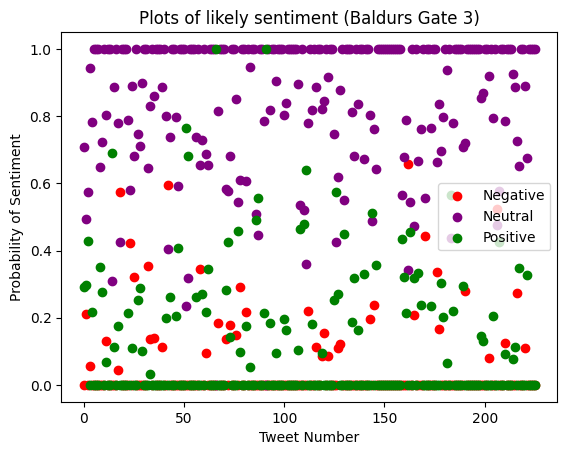

In [10]:
#Plotting for results
fig, ax = plt.subplots()

ax.scatter(range(len(bg3_tweets["Tweet Content"])),neg_list, color = "red", label = "Negative")
ax.scatter(range(len(bg3_tweets["Tweet Content"])),neu_list, color = "purple", label = "Neutral")
ax.scatter(range(len(bg3_tweets["Tweet Content"])),pos_list, color = "green", label = "Positive") 
plt.title("Plots of likely sentiment (Baldurs Gate 3)")
plt.xlabel("Tweet Number")
plt.ylabel("Probability of Sentiment")
plt.legend()
plt.show()

Text(0.5, 1.0, 'Most likely sentiment of Tweets')

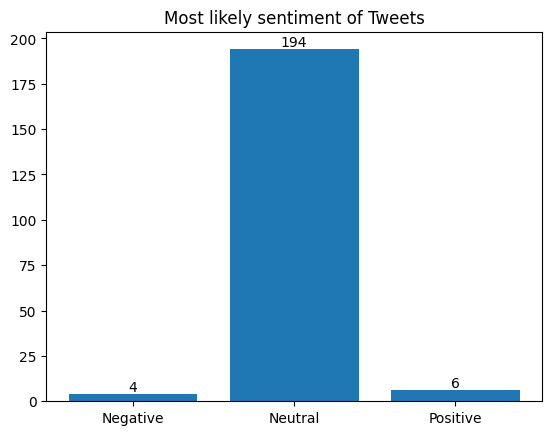

In [9]:
sentiment = ["Negative", "Neutral", "Positive"]
sentiment_values = [neg_count, neu_count, pos_count]
graph_one = plt.bar(sentiment, sentiment_values)
#Code to labels bars for the bar graph made with assistance from HiTA, accessed 11/17/2025, prompts ("Hello again! how would I label the value of a bar on a bar graph for my plot?"), ("Yes I would love a small code snippet as I have no experience with this!")

for bar in graph_one:
    y_val = bar.get_height()

    plt.text(bar.get_x() + bar.get_width()/2.0, y_val, int(y_val), va="bottom", ha="center")

plt.title("Most likely sentiment of Tweets")